In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np 
import os 
import pandas as pd 

In [2]:
import pandas as pd
train_data= pd.read_csv('/content/atis_intents_train.csv',
                       names= ["target", "text"])

test_data= pd.read_csv('/content/atis_intents_test.csv',
                       names= ["target", "text"])

train_data 

,target,text
0,atis_flight,i want to fly from boston at 838 am and arriv...
1,atis_flight,what flights are available from pittsburgh to...
2,atis_flight_time,what is the arrival time in san francisco for...
3,atis_airfare,cheapest airfare from tacoma to orlando
4,atis_airfare,round trip fares from pittsburgh to philadelp...
...,...,...
4829,atis_airfare,what is the airfare for flights from denver t...
4830,atis_flight,do you have any flights from denver to baltim...
4831,atis_airline,which airlines fly into and out of denver
4832,atis_flight,does continental fly from boston to san franc...


In [3]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    nGraphRow = int(nGraphRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
print(train_data.target.unique())

['atis_flight' 'atis_flight_time' 'atis_airfare' 'atis_aircraft'
 'atis_ground_service' 'atis_airline' 'atis_abbreviation' 'atis_quantity']


In [6]:
train_data.target.value_counts()

atis_flight            3666
atis_airfare            423
atis_ground_service     255
atis_airline            157
atis_abbreviation       147
atis_aircraft            81
atis_flight_time         54
atis_quantity            51
Name: target, dtype: int64

In [7]:
train_data = train_data[train_data["target"].str.contains("#")==False]
train_data.target.value_counts()

atis_flight            3666
atis_airfare            423
atis_ground_service     255
atis_airline            157
atis_abbreviation       147
atis_aircraft            81
atis_flight_time         54
atis_quantity            51
Name: target, dtype: int64

In [8]:
train_data = train_data[train_data["text"].str.contains("#")==False]
train_data.target.value_counts()

atis_flight            3666
atis_airfare            423
atis_ground_service     255
atis_airline            157
atis_abbreviation       147
atis_aircraft            81
atis_flight_time         54
atis_quantity            51
Name: target, dtype: int64

In [9]:
train_null = pd.isnull(train_data["target"]) 
train_data[train_null]

,target,text


In [10]:
train_null = pd.isnull(train_data["text"]) 
train_data[train_null]


,target,text


In [11]:
train_data.head(5)

,target,text
0,atis_flight,i want to fly from boston at 838 am and arriv...
1,atis_flight,what flights are available from pittsburgh to...
2,atis_flight_time,what is the arrival time in san francisco for...
3,atis_airfare,cheapest airfare from tacoma to orlando
4,atis_airfare,round trip fares from pittsburgh to philadelp...


In [12]:
  nunique = train_data.nunique()
  nunique

target       8
text      4499
dtype: int64

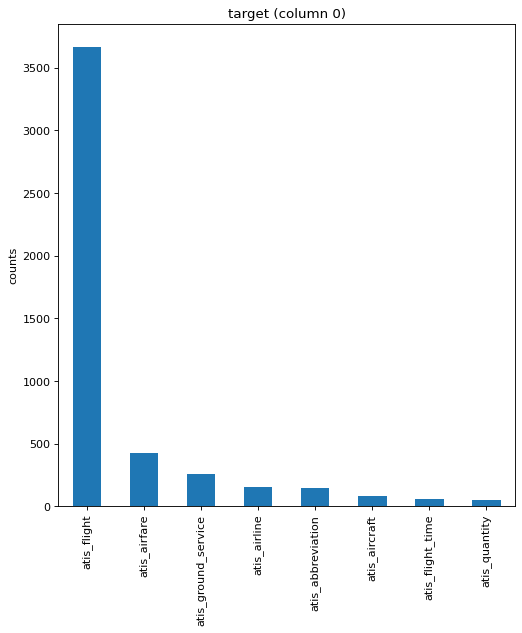

In [13]:
plotPerColumnDistribution(train_data, 10, 5)

In [14]:
print(test_data.target.unique())

['atis_flight' 'atis_airfare' 'atis_ground_service' 'atis_airline'
 'atis_flight_time' 'atis_quantity' 'atis_abbreviation' 'atis_aircraft']


In [15]:
test_data.target.value_counts()

atis_flight            632
atis_airfare            48
atis_airline            38
atis_ground_service     36
atis_abbreviation       33
atis_aircraft            9
atis_quantity            3
atis_flight_time         1
Name: target, dtype: int64

In [16]:
test_data = test_data[test_data["target"].str.contains("#")==False]
test_data.target.value_counts()

atis_flight            632
atis_airfare            48
atis_airline            38
atis_ground_service     36
atis_abbreviation       33
atis_aircraft            9
atis_quantity            3
atis_flight_time         1
Name: target, dtype: int64

In [17]:
test_null = pd.isnull(test_data["target"]) 
test_data[test_null]

,target,text


In [18]:
test_null = pd.isnull(test_data["text"]) 
test_data[test_null]

,target,text


In [19]:
test_data.head(5)

,target,text
0,atis_flight,i would like to find a flight from charlotte ...
1,atis_airfare,on april first i need a ticket from tacoma to...
2,atis_flight,on april first i need a flight going from pho...
3,atis_flight,i would like a flight traveling one way from ...
4,atis_flight,i would like a flight from orlando to salt la...


In [20]:
  nunique = test_data.nunique()
  nunique

target      8
text      763
dtype: int64

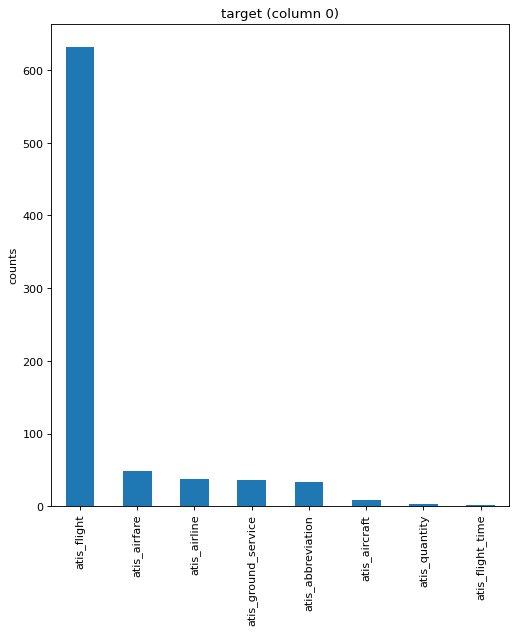

In [21]:
plotPerColumnDistribution(test_data, 10, 5)

In [22]:
train_data= train_data.append(train_data.loc[train_data.target.isin(["atis_flight_time", "atis_quantity"]), :])

<ipython-input-22-c6517fcde83d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data= train_data.append(train_data.loc[train_data.target.isin(["atis_flight_time", "atis_quantity"]), :])


In [23]:
from sklearn.preprocessing import OneHotEncoder as OHE
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
nltk.download('punkt')
nltk.download('stopwords')
from tensorflow.keras.preprocessing.sequence import pad_sequences


def normalize(text):
    return " ".join(text)

def remove_stop(strings, stop_list):
    classed= [s for s in strings if s not in stop_list]
    return classed

y_encoder= OHE().fit(np.array(train_data.target).reshape(-1,1))
ytr_encoded= y_encoder.transform(np.array(train_data.target).reshape(-1,1)).toarray()
yts_encoded= y_encoder.transform(np.array(test_data.target).reshape(-1,1)).toarray()

train_data["lower_text"]= train_data.text.map(lambda x: x.lower())
test_data["lower_text"]= test_data.text.map(lambda x: x.lower())
train_data["tokenized"]= train_data.lower_text.map(word_tokenize)
test_data["tokenized"]= test_data.lower_text.map(word_tokenize)

stop= stopwords.words("english")
stop_punc= list(set(punctuation))+ stop

train_data["selected"]= train_data.tokenized.map(lambda df: remove_stop(df, stop_punc))
test_data["selected"]= test_data.tokenized.map(lambda df: remove_stop(df, stop_punc))

stemmer= PorterStemmer()

train_data["stemmed"]= train_data.selected.map(lambda xs: [stemmer.stem(x) for x in xs])
train_data["normalized"]= train_data.stemmed.apply(normalize)

test_data["stemmed"]= test_data.selected.map(lambda xs: [stemmer.stem(x) for x in xs])
test_data["normalized"]= test_data.stemmed.apply(normalize)

tokenizer= Tokenizer(num_words= 10000)
tokenizer.fit_on_texts(train_data.normalized)

tokenized_train= tokenizer.texts_to_sequences(train_data.normalized)
tokenized_test= tokenizer.texts_to_sequences(test_data.normalized)

tokenizer.word_index.keys().__len__()

train_padded= pad_sequences(tokenized_train, maxlen= 20, padding= "pre")
test_padded= pad_sequences(tokenized_test, maxlen= 20, padding= "pre")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
train_padded.shape

(4939, 20)

In [25]:
def transform_x(data, tokenizer):
    output_shape= [data.shape[0],
                  data.shape[1],
                  tokenizer.word_index.keys().__len__()]
    results= np.zeros(output_shape)
    
    for i in range(data.shape[0]):
        for ii in range(data.shape[1]):
            results[i, ii, data[i,ii]-1]= 1
    return results

xtr_transformed= transform_x(train_padded, tokenizer)
xts_transformed= transform_x(test_padded, tokenizer)


In [26]:
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy as CC
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.initializers import he_uniform, glorot_uniform
from tensorflow.keras.metrics import AUC
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l2


class LSTMModel(object):
    
    def build_model(self, input_dim, output_shape, steps, dropout_rate, kernel_regularizer, bias_regularizer):
        input_layer= Input(shape= (steps, input_dim))
        
        #make lstm_layer
        lstm= LSTM(units= steps)(input_layer)
        dense_1= Dense(output_shape, kernel_initializer= he_uniform(),
                       bias_initializer= "zeros", 
                       kernel_regularizer= l2(l= kernel_regularizer),
                       bias_regularizer= l2(l= bias_regularizer))(lstm)
        x= BatchNormalization()(dense_1)
        x= relu(x)
        x= Dropout(rate= dropout_rate)(x)
        o= Dense(output_shape, kernel_initializer= glorot_uniform(),
                 bias_initializer= "zeros", 
                 kernel_regularizer= l2(l= kernel_regularizer), 
                 bias_regularizer= l2(l= bias_regularizer))(dense_1)
        o= BatchNormalization()(o)
        output= softmax(o, axis= 1)
        
        loss= CC()
        metrics= AUC()
        optimizer= Adam()
        self.model= Model(inputs= [input_layer], outputs= [output])
        self.model.compile(optimizer= optimizer, loss= loss, metrics= [metrics])
        
        
    def train(self, x, y, validation_split, epochs):
        self.model.fit(x, y, validation_split= validation_split, epochs= epochs)
        
    def predict(self, x):
        return self.model.predict(x)

In [27]:
steps= xtr_transformed.shape[1]
dim= xtr_transformed.shape[2]
output_shape= ytr_encoded.shape[1]

model= LSTMModel()
model.build_model(input_dim= dim,
                  output_shape= output_shape,
                  steps= steps, 
                  dropout_rate= 0.5, 
                  bias_regularizer= 0.3, 
                  kernel_regularizer= 0.3)

In [28]:
model.train(xtr_transformed, ytr_encoded,
           0.2, 100)

Epoch 1/100
124/124 [==============================] - 13s 13ms/step - loss: 6.8924 - auc: 0.7734 - val_loss: 5.5852 - val_auc: 0.7672
Epoch 2/100
124/124 [==============================] - 1s 7ms/step - loss: 3.8726 - auc: 0.9464 - val_loss: 3.3597 - val_auc: 0.9687
Epoch 3/100
124/124 [==============================] - 1s 8ms/step - loss: 2.3140 - auc: 0.9775 - val_loss: 2.0556 - val_auc: 0.9845
Epoch 4/100
124/124 [==============================] - 1s 8ms/step - loss: 1.5157 - auc: 0.9867 - val_loss: 1.3735 - val_auc: 0.9878
Epoch 5/100
124/124 [==============================] - 1s 9ms/step - loss: 1.0989 - auc: 0.9923 - val_loss: 1.0654 - val_auc: 0.9878
Epoch 6/100
124/124 [==============================] - 2s 12ms/step - loss: 0.8840 - auc: 0.9947 - val_loss: 0.8689 - val_auc: 0.9859
Epoch 7/100
124/124 [==============================] - 1s 9ms/step - loss: 0.7552 - auc: 0.9949 - val_loss: 0.8197 - val_auc: 0.9822
Epoch 8/100
124/124 [==============================] - 1s 8ms/step

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

prediction= y_encoder.inverse_transform(model.predict(xtr_transformed))
cm = confusion_matrix(train_data.target, prediction)

155/155 [==============================] - 1s 4ms/step


In [87]:
import seaborn as sns

def conf_matrix(conf_mat,name):
    group_names = ['True Pos Normal','False Neg','False Neg','False Neg',
                   'False Neg','True Pos Lung','False Neg','False Neg',
                   'False Neg','False Neg','True Pos Pneumonia','False Neg',
                   'False Neg','False Neg','False Neg','True Pos COVID']
    group_counts = ["{0:0.0f}".format(value) for value in
                    conf_mat.flatten()]
    print(group_counts)
    group_percentages = ["{0:.2%}".format(value) for value in
                         conf_mat.flatten()/np.sum(conf_mat)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    # labels = np.asarray(labels).reshape(2,4)
    labels = np.asarray(labels).repeat(4).reshape(8, 8)
    fig, ax = plt.subplots(figsize=(10,10))
    ax=sns.heatmap(conf_mat, annot=labels, fmt='',ax=ax)
    ax.set_title(label=name+' Confussion Matrix')
    ax.plot
    fig.savefig(name+'_confussion.png')

['146', '0', '0', '1', '0', '0', '0', '0', '0', '80', '0', '0', '0', '0', '1', '0', '0', '0', '419', '0', '4', '0', '0', '0', '0', '0', '0', '155', '2', '0', '0', '0', '0', '1', '1', '1', '3662', '1', '0', '0', '0', '0', '0', '0', '2', '104', '2', '0', '0', '0', '0', '0', '0', '0', '255', '0', '0', '0', '0', '0', '0', '0', '0', '102']


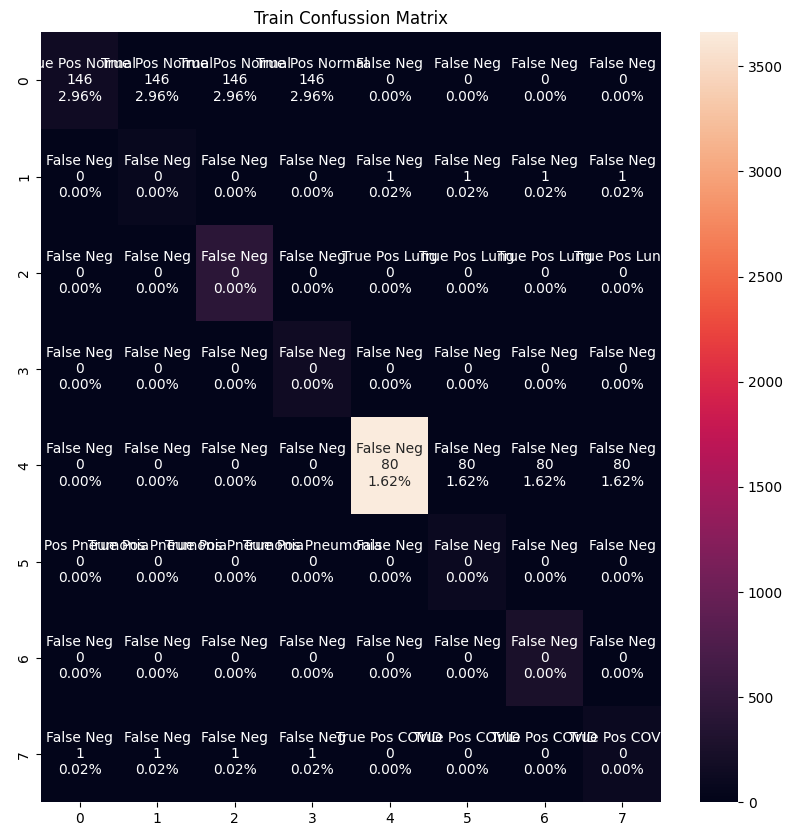

In [88]:
conf_matrix(cm,'Train')

In [29]:
from sklearn.metrics import classification_report

prediction= y_encoder.inverse_transform(model.predict(xtr_transformed))
print(classification_report(train_data.target, prediction))

155/155 [==============================] - 1s 4ms/step
                     precision    recall  f1-score   support

  atis_abbreviation       1.00      0.99      1.00       147
      atis_aircraft       0.99      0.99      0.99        81
       atis_airfare       1.00      0.99      0.99       423
       atis_airline       0.99      0.99      0.99       157
        atis_flight       1.00      1.00      1.00      3666
   atis_flight_time       0.99      0.96      0.98       108
atis_ground_service       0.99      1.00      0.99       255
      atis_quantity       1.00      1.00      1.00       102

           accuracy                           1.00      4939
          macro avg       0.99      0.99      0.99      4939
       weighted avg       1.00      1.00      1.00      4939



In [81]:
train_data.target

0            atis_flight
1            atis_flight
2       atis_flight_time
3           atis_airfare
4           atis_airfare
              ...       
4186    atis_flight_time
4194       atis_quantity
4320    atis_flight_time
4412    atis_flight_time
4457    atis_flight_time
Name: target, Length: 4939, dtype: object

In [89]:
prediction_test= y_encoder.inverse_transform(model.predict(xts_transformed))
cm = confusion_matrix(test_data.target, prediction_test)

25/25 [==============================] - 0s 3ms/step


['33', '0', '0', '0', '0', '0', '0', '0', '0', '8', '0', '0', '1', '0', '0', '0', '0', '0', '44', '0', '4', '0', '0', '0', '0', '0', '0', '37', '1', '0', '0', '0', '0', '1', '2', '5', '617', '1', '2', '4', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '2', '0', '34', '0', '0', '0', '0', '0', '0', '0', '0', '3']


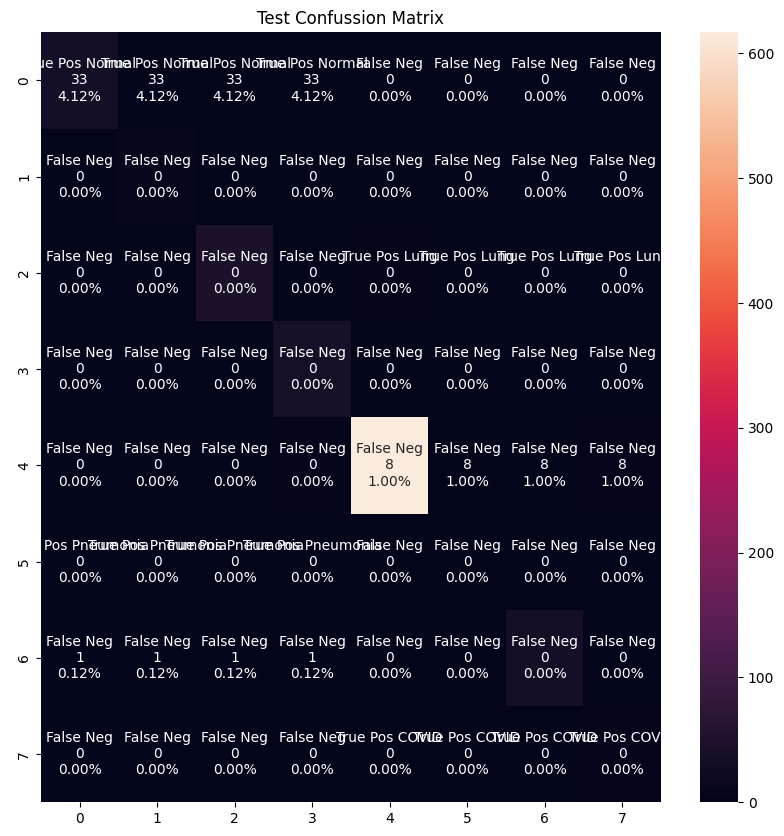

In [90]:
conf_matrix(cm,'Test')

In [82]:
from sklearn.metrics import classification_report

prediction_test= y_encoder.inverse_transform(model.predict(xts_transformed))
print(classification_report(test_data.target, prediction_test))

25/25 [==============================] - 0s 3ms/step
                     precision    recall  f1-score   support

  atis_abbreviation       1.00      1.00      1.00        33
      atis_aircraft       0.89      0.89      0.89         9
       atis_airfare       0.96      0.92      0.94        48
       atis_airline       0.88      0.97      0.93        38
        atis_flight       0.99      0.98      0.98       632
   atis_flight_time       0.50      1.00      0.67         1
atis_ground_service       0.94      0.94      0.94        36
      atis_quantity       0.43      1.00      0.60         3

           accuracy                           0.97       800
          macro avg       0.82      0.96      0.87       800
       weighted avg       0.98      0.97      0.97       800

